# House Price Prediction - Advanced Regression Techniques
Dataset Link - https://www.kaggle.com/c/house-prices-advanced-regression-techniques
## Feature Selection

We first applying feature selection techniques on the train data and then we will follow up on the test data as well. 

### Train Data

#### Importing required libraries and the training dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Reading the dataset
df = pd.read_csv('train_preprocessed.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_NaN,GarageYrBlt_NaN,SalePrice
0,1,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.12250,0.333333,1.0,0.50,0.5,1.00,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.0,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5,0.0,0.0,12.247694
1,2,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.00000,1.000000,1.0,0.25,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.0,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5,0.0,0.0,12.109011
2,3,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.666667,0.500,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.10125,0.333333,1.0,0.50,0.5,1.00,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.0,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5,0.0,0.0,12.317167
3,4,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.00000,1.000000,1.0,0.00,1.0,0.25,1.00,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.0,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0,0.0,0.0,11.849398
4,5,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.777778,0.500,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.21875,0.333333,1.0,0.50,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.0,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5,0.0,0.0,12.429216


In [3]:
# Printing shape of training dataset
df.shape

(1460, 83)

- While extracting independent and dependent features into X_train and y_train, we will also drop the 'Id' feature from the independent features as 'Id' is basically just indexing the rows of the dataframe, and not providing any useful information.
- Infact keeping the 'Id' feature could harm the model performance as it introduces some order/ranking to the rows. This may give some kind of false intuition to the model that 'Id' ranking is also important, even when it is not.

In [4]:
# Extracting X_train (independent features) and y_train (dependent_features)
X_train = df.drop(['Id', 'SalePrice'], axis=1)
y_train = df['SalePrice']
print('X_train Dimensions:', X_train.shape)
print('y_train Dimensions:', y_train.shape)

X_train Dimensions: (1460, 81)
y_train Dimensions: (1460,)


#### Dropping Features Based on Pearson Correlation Coefficient

In [5]:
# Extracting some continous features to plot correlation matrix heatmap
continous_features = [feature for feature in X_train.columns if X_train[feature].nunique() > 25]

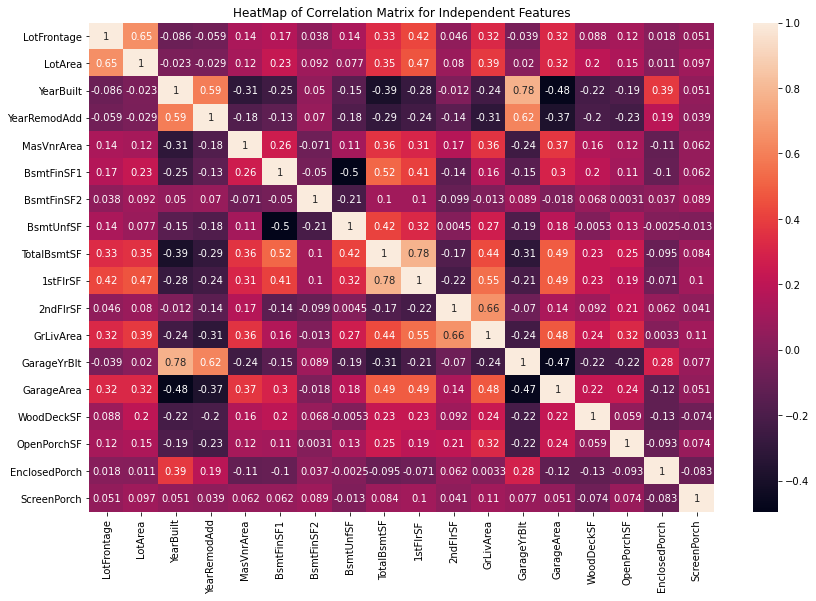

In [6]:
# Plotting the heatmap of correlation matrix for independent features
plt.figure(figsize=(14, 9))
sns.heatmap(X_train[continous_features].corr(), annot=True)
plt.title('HeatMap of Correlation Matrix for Independent Features')
plt.show()

- Assuming a threshold of 0.8 for the Pearson correlation coefficient, none of the independent features are highly correlated, so we can keep all of them.

#### Feature Importance using ExtraTreeRegressor

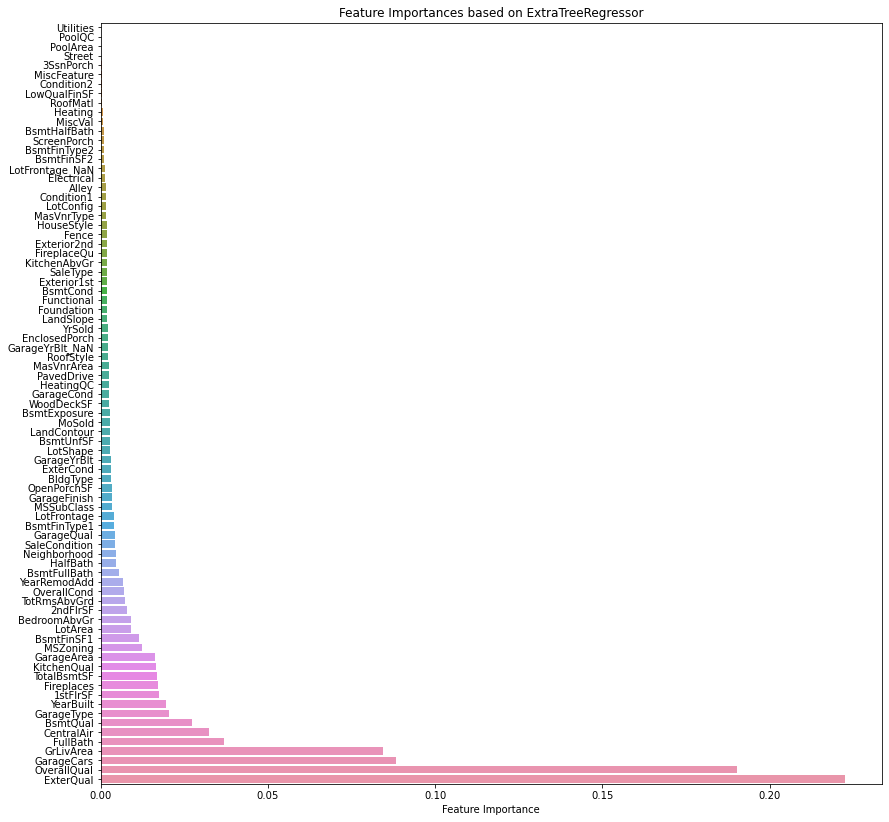

In [7]:
# Training ExtraTreeRegressor model on train data and plotting the feature importances
extra_tree_regressor = ExtraTreesRegressor()
extra_tree_regressor.fit(X_train, y_train)

feature_importances = pd.Series(extra_tree_regressor.feature_importances_, X_train.columns).sort_values()
plt.figure(figsize=(14, 14))
sns.barplot(x=feature_importances, y=feature_importances.index, orient='h')
plt.title('Feature Importances based on ExtraTreeRegressor')
plt.xlabel('Feature Importance')
plt.show()

In [8]:
# Extracting the top 20 independent features
features_selected_extra_tree = list(feature_importances.index[-20:])
print('Top 20 Most Important Features are\n\n', features_selected_extra_tree)

Top 20 Most Important Features are

 ['TotRmsAbvGrd', '2ndFlrSF', 'BedroomAbvGr', 'LotArea', 'BsmtFinSF1', 'MSZoning', 'GarageArea', 'KitchenQual', 'TotalBsmtSF', 'Fireplaces', '1stFlrSF', 'YearBuilt', 'GarageType', 'BsmtQual', 'CentralAir', 'FullBath', 'GrLivArea', 'GarageCars', 'OverallQual', 'ExterQual']


- It is clearly visible that most of the independent features are much important for predicting the dependent feature
- We can drop most of the independent features and only keep the top 15~20 (more important) features

#### Feature Importance using Lasso Regression and SelectFromModel

In [9]:
# Training a feature selection model using Lasso and selectFromModel
feature_selection_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_selection_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

- Chose some random value of alpha (0.005), which works well but we can tune it further it we want to.
- Higher the value of alpha, the less number of independent features the model keeps/selects

In [10]:
# Printing which independent features were dropped and which were kept
feature_selection_model.get_support()

array([False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [11]:
# Extracting the selected features and printing there count
features_selected = X_train.columns[feature_selection_model.get_support()]
print('The selected features are', features_selected, '\n')
print('Total Number of Features in Dataset:', X_train.shape[1])
print('Total Number of Selected Features:', len(features_selected))
print('Total Number of Features with Coefficients Shrunk to Zero:', X_train.shape[1] - len(features_selected))

The selected features are Index(['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive'],
      dtype='object') 

Total Number of Features in Dataset: 81
Total Number of Selected Features: 20
Total Number of Features with Coefficients Shrunk to Zero: 61


In [12]:
# Printing the selected features from both the models
print('From Lasso and selectFromModel\n\n', sorted(features_selected))
print('\nFrom ExtraTreeRegressor\n\n', sorted(features_selected_extra_tree))

From Lasso and selectFromModel

 ['1stFlrSF', 'BldgType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFullBath', 'BsmtQual', 'CentralAir', 'ExterQual', 'Fireplaces', 'GarageCars', 'GarageFinish', 'GarageType', 'GrLivArea', 'HeatingQC', 'KitchenQual', 'LotShape', 'MSZoning', 'OverallQual', 'PavedDrive', 'YearRemodAdd']

From ExtraTreeRegressor

 ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtQual', 'CentralAir', 'ExterQual', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageType', 'GrLivArea', 'KitchenQual', 'LotArea', 'MSZoning', 'OverallQual', 'TotRmsAbvGrd', 'TotalBsmtSF', 'YearBuilt']


- We can see from above comparison that many of the selected features are common from both the models while some are different as well
- Specifically, 11 out of 20 features are common in both while 9 are different
- We can even try to train our model on these 11 common features and see if it improves the performance or not!

#### Exporting Train Data with Selected Features

- Initially let's use the selected features from the Lasso and SelectFromModel model (features_selected)
- After training this data with these features, we can also try the features selected from the ExtraTreeRegressor (features_selected_extra_tree)
- Then we can decide which model's selected features to keep

In [13]:
# Dropping the less important features and keep the selected features only
df = pd.concat([df[features_selected], df['SalePrice']], axis=1)
df.head()

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SalePrice
0,0.5,1.0,0.0,0.666667,0.098361,0.333333,0.5,1.00,0.333333,0.0,1.0,0.356155,0.577712,0.333333,0.666667,0.000000,0.0,0.666667,0.50,1.0,12.247694
1,0.5,1.0,0.0,0.555556,0.524590,1.000000,0.5,0.25,0.000000,0.0,1.0,0.503056,0.470245,0.000000,1.000000,0.333333,0.0,0.666667,0.50,1.0,12.109011
2,0.5,0.0,0.0,0.666667,0.114754,0.333333,0.5,0.75,0.333333,0.0,1.0,0.383441,0.593095,0.333333,0.666667,0.333333,0.0,0.666667,0.50,1.0,12.317167
3,0.5,0.0,0.0,0.666667,0.606557,1.000000,1.0,1.00,0.000000,0.5,1.0,0.399941,0.579157,0.333333,0.666667,0.333333,0.6,1.000000,0.75,1.0,11.849398
4,0.5,0.0,0.0,0.777778,0.147541,0.333333,0.5,0.00,0.333333,0.0,1.0,0.466237,0.666523,0.333333,0.666667,0.333333,0.0,0.666667,0.75,1.0,12.429216


In [14]:
# Exporting the dataframe to CSV file
df.to_csv('train_final.csv', index=False)

### Test Data

- Now we apply the exact same feature selection steps to the test data
- Steps to follow as per train data
    - Import test data
    - Drop feature 'Id'
    - Dropping features using Lasso and SelectFromModel technique
    - Export the test data with selected features

In [15]:
# Importing the test data
df_test = pd.read_csv('test_preprocessed.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_NaN,GarageYrBlt_NaN
0,1461,0.000000,1.0,0.495064,0.428726,0.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.409091,0.2,0.0,0.0,0.2,0.444444,0.625,0.360294,0.819672,0.0,0.0,0.8,0.9,0.5,0.0000,1.000000,1.0,0.25,1.0,1.0,1.0,0.833333,0.082920,0.5,0.097693,0.115582,0.144354,0.0,1.0,1.0,1.0,0.373438,0.000000,0.0,0.349081,0.0,0.0,0.333333,0.0,0.250,0.333333,1.333333,0.250000,1.0,0.000000,0.6,0.2,0.457944,1.000000,0.25,0.514810,1.0,1.0,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.333333,0.5,0.0,0.0
1,1462,0.000000,0.5,0.499662,0.468857,0.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.409091,0.4,0.0,0.0,0.2,0.555556,0.625,0.382353,0.868852,0.5,0.0,0.9,1.0,0.0,0.0675,1.000000,1.0,0.25,1.0,1.0,1.0,0.000000,0.163536,1.0,0.000000,0.173801,0.217512,0.0,1.0,1.0,1.0,0.522632,0.000000,0.0,0.488544,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.6,0.2,0.485981,1.000000,0.25,0.220028,1.0,1.0,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,0.0,0.50,0.5,0.806452,0.454545,1.0,1.333333,0.5,0.0,0.0
2,1463,0.235294,0.5,0.466207,0.462769,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.227273,0.4,0.0,0.0,0.4,0.444444,0.500,0.095588,0.213115,0.0,0.0,0.8,0.9,0.5,0.0000,1.000000,1.0,0.50,0.5,1.0,1.0,0.333333,0.140149,1.0,0.000000,0.058647,0.151882,0.0,0.5,1.0,1.0,0.386718,0.339467,0.0,0.560546,0.0,0.0,0.666667,0.5,0.375,0.333333,1.333333,0.333333,1.0,0.333333,1.0,0.2,0.121495,0.000000,0.50,0.339915,1.0,1.0,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,0.0,0.75,0.0,0.000000,0.181818,1.0,1.333333,0.5,0.0,0.0
3,1464,0.235294,0.5,0.485693,0.398875,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.227273,0.4,0.0,0.0,0.4,0.555556,0.625,0.088235,0.213115,0.0,0.0,0.8,0.9,0.0,0.0125,1.000000,1.0,0.50,1.0,1.0,1.0,0.333333,0.106662,1.0,0.000000,0.138699,0.151555,0.0,0.0,1.0,1.0,0.385901,0.328329,0.0,0.555075,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.2,0.112150,0.000000,0.50,0.331453,1.0,1.0,1.0,0.420070,0.065814,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.333333,0.5,0.0,0.0
4,1465,0.588235,0.5,0.265271,0.263841,0.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.863636,0.4,0.0,1.0,0.2,0.777778,0.500,0.132353,0.311475,0.0,0.0,0.3,0.4,0.5,0.0000,0.666667,1.0,0.50,0.5,1.0,1.0,0.000000,0.046598,1.0,0.000000,0.435360,0.209493,0.0,0.0,1.0,1.0,0.508416,0.000000,0.0,0.475254,0.0,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.6,0.2,0.168224,0.666667,0.50,0.356841,1.0,1.0,1.0,0.000000,0.149909,0.0,0.0,0.30,0.0,0.0,0.50,0.0,0.000000,0.000000,1.0,1.333333,0.5,0.0,0.0


In [16]:
# Dropping feature 'Id'
df_test = df_test.drop(['Id'], axis=1)
print('Dataframe Shape:', df_test.shape)
df_test.head()

Dataframe Shape: (1459, 81)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_NaN,GarageYrBlt_NaN
0,0.000000,1.0,0.495064,0.428726,0.0,0.5,1.0,1.000000,0.0,0.75,0.0,0.409091,0.2,0.0,0.0,0.2,0.444444,0.625,0.360294,0.819672,0.0,0.0,0.8,0.9,0.5,0.0000,1.000000,1.0,0.25,1.0,1.0,1.0,0.833333,0.082920,0.5,0.097693,0.115582,0.144354,0.0,1.0,1.0,1.0,0.373438,0.000000,0.0,0.349081,0.0,0.0,0.333333,0.0,0.250,0.333333,1.333333,0.250000,1.0,0.000000,0.6,0.2,0.457944,1.000000,0.25,0.514810,1.0,1.0,1.0,0.163361,0.000000,0.0,0.0,0.25,0.0,0.0,0.75,0.0,0.000000,0.454545,1.0,1.333333,0.5,0.0,0.0
1,0.000000,0.5,0.499662,0.468857,0.0,0.5,0.0,1.000000,0.0,0.00,0.0,0.409091,0.4,0.0,0.0,0.2,0.555556,0.625,0.382353,0.868852,0.5,0.0,0.9,1.0,0.0,0.0675,1.000000,1.0,0.25,1.0,1.0,1.0,0.000000,0.163536,1.0,0.000000,0.173801,0.217512,0.0,1.0,1.0,1.0,0.522632,0.000000,0.0,0.488544,0.0,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.6,0.2,0.485981,1.000000,0.25,0.220028,1.0,1.0,1.0,0.458576,0.065814,0.0,0.0,0.00,0.0,0.0,0.50,0.5,0.806452,0.454545,1.0,1.333333,0.5,0.0,0.0
2,0.235294,0.5,0.466207,0.462769,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.227273,0.4,0.0,0.0,0.4,0.444444,0.500,0.095588,0.213115,0.0,0.0,0.8,0.9,0.5,0.0000,1.000000,1.0,0.50,0.5,1.0,1.0,0.333333,0.140149,1.0,0.000000,0.058647,0.151882,0.0,0.5,1.0,1.0,0.386718,0.339467,0.0,0.560546,0.0,0.0,0.666667,0.5,0.375,0.333333,1.333333,0.333333,1.0,0.333333,1.0,0.2,0.121495,0.000000,0.50,0.339915,1.0,1.0,1.0,0.247375,0.062157,0.0,0.0,0.00,0.0,0.0,0.75,0.0,0.000000,0.181818,1.0,1.333333,0.5,0.0,0.0
3,0.235294,0.5,0.485693,0.398875,0.0,0.5,0.0,1.000000,0.0,0.75,0.0,0.227273,0.4,0.0,0.0,0.4,0.555556,0.625,0.088235,0.213115,0.0,0.0,0.8,0.9,0.0,0.0125,1.000000,1.0,0.50,1.0,1.0,1.0,0.333333,0.106662,1.0,0.000000,0.138699,0.151555,0.0,0.0,1.0,1.0,0.385901,0.328329,0.0,0.555075,0.0,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.2,0.112150,0.000000,0.50,0.331453,1.0,1.0,1.0,0.420070,0.065814,0.0,0.0,0.00,0.0,0.0,0.50,0.0,0.000000,0.454545,1.0,1.333333,0.5,0.0,0.0
4,0.588235,0.5,0.265271,0.263841,0.0,0.5,0.0,0.333333,0.0,0.75,0.0,0.863636,0.4,0.0,1.0,0.2,0.777778,0.500,0.132353,0.311475,0.0,0.0,0.3,0.4,0.5,0.0000,0.666667,1.0,0.50,0.5,1.0,1.0,0.000000,0.046598,1.0,0.000000,0.435360,0.209493,0.0,0.0,1.0,1.0,0.508416,0.000000,0.0,0.475254,0.0,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.6,0.2,0.168224,0.666667,0.50,0.356841,1.0,1.0,1.0,0.000000,0.149909,0.0,0.0,0.30,0.0,0.0,0.50,0.0,0.000000,0.000000,1.0,1.333333,0.5,0.0,0.0


In [17]:
# Dropping the less important features and keep the selected features only
df_test = df_test[features_selected]
print('Dataframe Shape:', df_test.shape)
df_test.head()

Dataframe Shape: (1459, 20)


,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,1.0,1.0,0.0,0.444444,0.819672,1.000000,1.0,1.0,0.833333,1.0,1.0,0.373438,0.349081,0.0,1.333333,0.000000,0.2,1.000000,0.25,1.0
1,0.5,0.0,0.0,0.555556,0.868852,1.000000,1.0,1.0,0.000000,1.0,1.0,0.522632,0.488544,0.0,0.666667,0.000000,0.2,1.000000,0.25,1.0
2,0.5,0.0,0.0,0.444444,0.213115,1.000000,0.5,1.0,0.333333,0.5,1.0,0.386718,0.560546,0.0,1.333333,0.333333,0.2,0.000000,0.50,1.0
3,0.5,0.0,0.0,0.555556,0.213115,1.000000,1.0,1.0,0.333333,0.0,1.0,0.385901,0.555075,0.0,0.666667,0.333333,0.2,0.000000,0.50,1.0
4,0.5,0.0,1.0,0.777778,0.311475,0.666667,0.5,1.0,0.000000,0.0,1.0,0.508416,0.475254,0.0,0.666667,0.000000,0.2,0.666667,0.50,1.0


In [18]:
# Exporting the dataframe to CSV file
df_test.to_csv('test_final.csv', index=False)